In [1]:
import numpy as np
data_coin_flips = np.random.randint(2, size=10000)
np.mean(data_coin_flips)

0.4913

In [2]:
bernoulli_flips = np.random.binomial(n=1, p=.5, size=10000)
np.mean(bernoulli_flips)

0.4975

In [3]:
def bern_pmf(x, p):
    if (x == 1):
        return p
    elif (x == 0):
        return 1 - p
    else:
        return "Value Not in Support of Distribution"

In [4]:
print(bern_pmf(1, .5))
print(bern_pmf(0, .5))

0.5
0.5


In [5]:
import scipy.stats as st
print(st.bernoulli.pmf(1, .5))
print(st.bernoulli.pmf(0, .5))

0.5
0.5


In [6]:
np.product(st.bernoulli.pmf(data_coin_flips, .5))

0.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


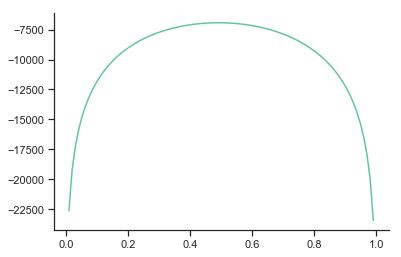

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')

params = np.linspace(0, 1, 100)
## should do exp, but to see in graph - I dont
p_x = [np.sum(np.log(st.bernoulli.pmf(data_coin_flips, p))) for p in params]
plt.plot(params, p_x)
sns.despine()

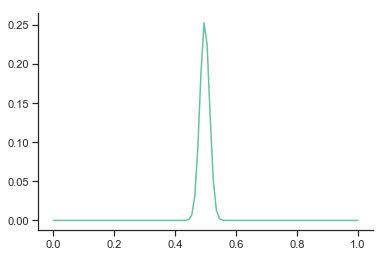

In [8]:
fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
p_fair = np.array([np.product(st.bernoulli.pmf(fair_flips, p)) for p in params])
p_fair = p_fair / np.sum(p_fair)
plt.plot(params, p_fair)
sns.despine()

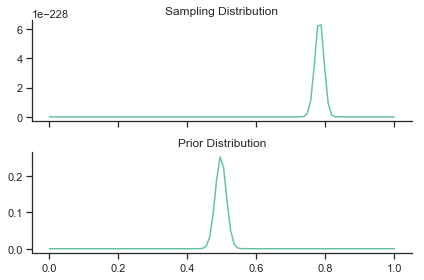

In [9]:
unfair_flips = bernoulli_flips = np.random.binomial(n=1, p=.8, size=1000)
p_unfair = np.array([np.product(st.bernoulli.pmf(unfair_flips, p)) for p in params])
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_unfair)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_fair)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()

In [10]:
def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.2, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
    
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
    
    return posterior

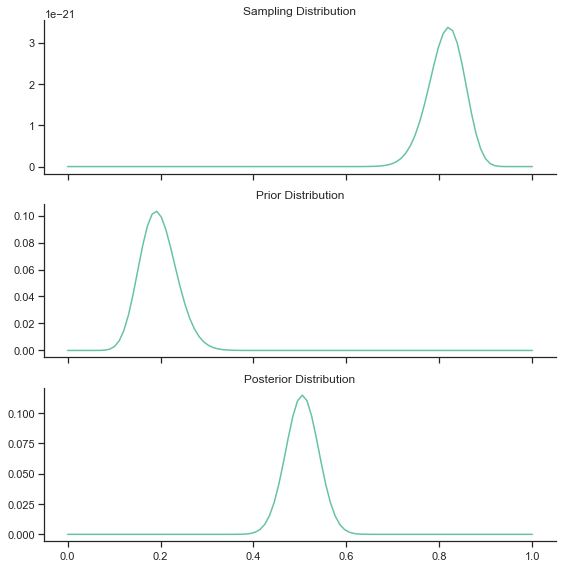

In [11]:
example_post = bern_post()

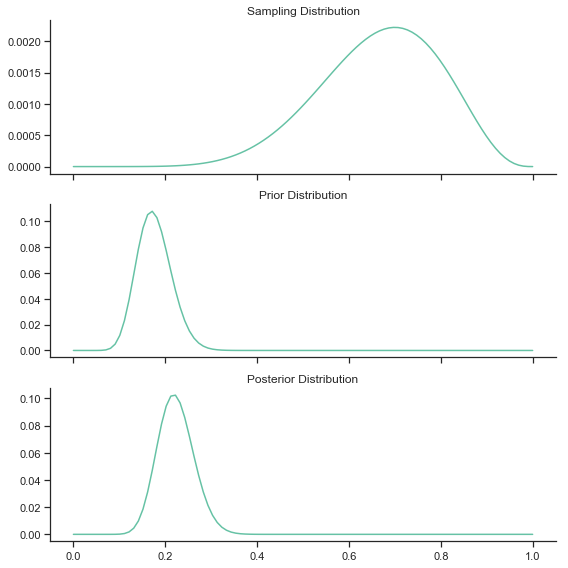

In [12]:
moredata_post = bern_post(n_sample=10)